In [ ]:
import gym


In [ ]:
gym.__version__


In [ ]:
env = gym.make("MountainCar-v0")

In [ ]:
env.reset()

In [ ]:
done = False

In [ ]:
while not done:
    action = 2
    new_sate,reward,done, _ = env.step(action)
    print(reward,new_sate)
    env.render()
env.close()

In [ ]:
print(env.observation_space.high)
print(env.observation_space.low)
print(env.action_space.n)

In [ ]:
discrit_os_size = [20] * len(env.observation_space.high)

In [ ]:
discrit_os_win_size = (env.observation_space.high - env.observation_space.low) / discrit_os_size

In [ ]:
print(discrit_os_win_size)

In [ ]:
import numpy as np

In [ ]:
q_table = np.random.uniform(low=-2,high=0,size=(discrit_os_size + [env.action_space.n]))
print(q_table.shape)
print(q_table)

In [ ]:
DISCOUNT = 0.95
learning_rate = 0.1
episodes = 25000

In [ ]:
def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low)/discrit_os_win_size
    return tuple(discrete_state.astype(np.int))

In [ ]:
discrete_state = get_discrete_state(env.reset())

In [ ]:
print(discrete_state)

In [ ]:
q_table[discrete_state]

In [ ]:
import gym
import numpy as np
env = gym.make("MountainCar-v0")
env.reset()
discrit_os_size = [20] * len(env.observation_space.high)
discrit_os_win_size = (env.observation_space.high - env.observation_space.low) / discrit_os_size
q_table = np.random.uniform(low=-2,high=0,size=(discrit_os_size + [env.action_space.n]))
print(q_table.shape)
print(q_table)
DISCOUNT = 0.95
learning_rate = 0.1
episodes = 25000
def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low)/discrit_os_win_size
    return tuple(discrete_state.astype(np.int))
discrete_state = get_discrete_state(env.reset())
q_table[discrete_state]
done = False
while not done:
    action = np.argmax(q_table[discrete_state])
    new_sate,reward,done, _ = env.step(action)
    new_discrete_state = get_discrete_state(new_sate)
    print(reward,new_sate)
    env.render()
    if not done:
        max_future_q = np.max(q_table[new_discrete_state])
        current_q =  q_table[discrete_state + (action,)]
        
        new_q = (1-learning_rate)*current_q + learning_rate*(reward + DISCOUNT*max_future_q)
        q_table[discrete_state + (action,)] = new_q
        
    elif new_sate[0] >= env.goal_position:
        q_table[discrete_state + (action,)] = 0
    discrete_state = new_discrete_state
env.close()

In [ ]:
import gym
import numpy as np
env = gym.make("MountainCar-v0")
env.reset()
discrit_os_size = [20] * len(env.observation_space.high)
discrit_os_win_size = (env.observation_space.high - env.observation_space.low) / discrit_os_size
q_table = np.random.uniform(low=-2,high=0,size=(discrit_os_size + [env.action_space.n]))
DISCOUNT = 0.95
learning_rate = 0.1
episodes = 25000
show_every = 10
def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low)/discrit_os_win_size
    return tuple(discrete_state.astype(np.int))
discrete_state = get_discrete_state(env.reset())
q_table[discrete_state]
for episode in range(episodes):
    if episode%show_every == 0:
        print(episode)
        render = True
    else:
        render = False
        
    discrete_state = get_discrete_state(env.reset())
    done = False
    while not done:
        action = np.argmax(q_table[discrete_state])
        new_sate,reward,done, _ = env.step(action)
        new_discrete_state = get_discrete_state(new_sate)
        
        if render:
            env.render()
        if not done:
            max_future_q = np.max(q_table[new_discrete_state])
            current_q =  q_table[discrete_state + (action,)]

            new_q = (1-learning_rate)*current_q + learning_rate*(reward + DISCOUNT*max_future_q)
            q_table[discrete_state + (action,)] = new_q

        elif new_sate[0] >= env.goal_position:
            print(f"we made it episode{episode}")
            q_table[discrete_state + (action,)] = 0
        discrete_state = new_discrete_state
env.close()

In [ ]:
import gym
import numpy as np
env = gym.make("MountainCar-v0")
env.reset()
discrit_os_size = [20] * len(env.observation_space.high)
discrit_os_win_size = (env.observation_space.high - env.observation_space.low) / discrit_os_size
q_table = np.random.uniform(low=-2,high=0,size=(discrit_os_size + [env.action_space.n]))

DISCOUNT = 0.95
learning_rate = 0.1
episodes = 25000
show_every = 10

epsilon = 0.5
START_EPSILON_DCAYING = 1
END_EPSILON_DECAYING = episodes//2
epsilon_decay_value = epsilon/(END_EPSILON_DECAYING-START_EPSILON_DCAYING)

def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low)/discrit_os_win_size
    return tuple(discrete_state.astype(np.int))
discrete_state = get_discrete_state(env.reset())
q_table[discrete_state]
for episode in range(episodes):
    if episode%show_every == 0:
        print(episode)
        render = True
    else:
        render = False
        
    discrete_state = get_discrete_state(env.reset())
    done = False
    while not done:
        
        action = np.argmax(q_table[discrete_state])
        new_sate,reward,done, _ = env.step(action)
        new_discrete_state = get_discrete_state(new_sate)
        
        if render:
            env.render()
        if not done:
            max_future_q = np.max(q_table[new_discrete_state])
            current_q =  q_table[discrete_state + (action,)]

            new_q = (1-learning_rate)*current_q + learning_rate*(reward + DISCOUNT*max_future_q)
            q_table[discrete_state + (action,)] = new_q

        elif new_sate[0] >= env.goal_position:
            print(f"we made it episode{episode}")
            q_table[discrete_state + (action,)] = 0
        discrete_state = new_discrete_state
    if END_EPSILON_DECAYING >=episode>=START_EPSILON_DCAYING:
        epsilon -= epsilon_decay_value
env.close()

In [ ]:
import gym
import numpy as np
env = gym.make("MountainCar-v0")
env.reset()
discrit_os_size = [20] * len(env.observation_space.high)
discrit_os_win_size = (env.observation_space.high - env.observation_space.low) / discrit_os_size
q_table = np.random.uniform(low=-2,high=0,size=(discrit_os_size + [env.action_space.n]))
ep_rewards = []
aggr_ep_rewards = {"ep":[], "avg":[], "min":[],"max":[]}
DISCOUNT = 0.95
learning_rate = 0.1
episodes = 25000
show_every = 10

epsilon = 0.5
START_EPSILON_DCAYING = 1
END_EPSILON_DECAYING = episodes//2
epsilon_decay_value = epsilon/(END_EPSILON_DECAYING-START_EPSILON_DCAYING)

def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low)/discrit_os_win_size
    return tuple(discrete_state.astype(np.int))
discrete_state = get_discrete_state(env.reset())
q_table[discrete_state]
for episode in range(episodes):
    episode_reward = 0
    if episode%show_every == 0:
        print(episode)
        render = True
    else:
        render = False
        
    discrete_state = get_discrete_state(env.reset())
    done = False
    while not done:
        if np.random.random() > epsilon:
            action = np.argmax(q_table[discrete_state])
        else:
            action = np.random.randint(0,env.action_space.n)
        new_sate,reward,done, _ = env.step(action)
        episode_reward += reward
        new_discrete_state = get_discrete_state(new_sate)
        
        if render:
            env.render()
        if not done:
            max_future_q = np.max(q_table[new_discrete_state])
            current_q =  q_table[discrete_state + (action,)]

            new_q = (1-learning_rate)*current_q + learning_rate*(reward + DISCOUNT*max_future_q)
            q_table[discrete_state + (action,)] = new_q

        elif new_sate[0] >= env.goal_position:
            print(f"we made it episode{episode}")
            q_table[discrete_state + (action,)] = 0
        discrete_state = new_discrete_state
    if END_EPSILON_DECAYING >=episode>=START_EPSILON_DCAYING:
        epsilon -= epsilon_decay_value
    ep_rewards.append(episode_reward)
    if not episode % show_every:
        average_reward = sum(ep_rewards[-show_every])
        
env.close()

0
Episode:0, avg:-200.0, min:-200.0,max:-200.0
100
Episode:100, avg:-200.0, min:-200.0,max:-200.0
200
Episode:200, avg:-200.0, min:-200.0,max:-200.0
300
Episode:300, avg:-200.0, min:-200.0,max:-200.0
400
Episode:400, avg:-200.0, min:-200.0,max:-200.0
500
Episode:500, avg:-200.0, min:-200.0,max:-200.0
600
Episode:600, avg:-200.0, min:-200.0,max:-200.0
700
Episode:700, avg:-200.0, min:-200.0,max:-200.0
800
Episode:800, avg:-200.0, min:-200.0,max:-200.0
900
Episode:900, avg:-200.0, min:-200.0,max:-200.0
1000
Episode:1000, avg:-200.0, min:-200.0,max:-200.0
we made it episode1021
we made it episode1062
we made it episode1078
we made it episode1084
1100
Episode:1100, avg:-199.35, min:-200.0,max:-170.0
we made it episode1126
we made it episode1127
we made it episode1136
we made it episode1177
1200
Episode:1200, avg:-199.82, min:-200.0,max:-190.0
we made it episode1227
1300
Episode:1300, avg:-199.91, min:-200.0,max:-191.0
we made it episode1304
we made it episode1306
we made it episode1308
we 

we made it episode2173
we made it episode2174
we made it episode2175
we made it episode2176
we made it episode2178
we made it episode2179
we made it episode2180
we made it episode2181
we made it episode2183
we made it episode2184
we made it episode2186
we made it episode2187
we made it episode2188
we made it episode2189
we made it episode2190
we made it episode2191
we made it episode2192
we made it episode2193
we made it episode2194
we made it episode2195
we made it episode2196
we made it episode2197
we made it episode2198
we made it episode2199
2200
Episode:2200, avg:-182.2, min:-200.0,max:-157.0
we made it episode2201
we made it episode2202
we made it episode2203
we made it episode2204
we made it episode2205
we made it episode2207
we made it episode2209
we made it episode2212
we made it episode2214
we made it episode2215
we made it episode2216
we made it episode2219
we made it episode2220
we made it episode2221
we made it episode2222
we made it episode2224
we made it episode2226
we m

we made it episode2800
Episode:2800, avg:-190.71, min:-200.0,max:-152.0
we made it episode2801
we made it episode2802
we made it episode2803
we made it episode2804
we made it episode2805
we made it episode2806
we made it episode2807
we made it episode2808
we made it episode2809
we made it episode2810
we made it episode2811
we made it episode2812
we made it episode2813
we made it episode2814
we made it episode2815
we made it episode2816
we made it episode2817
we made it episode2818
we made it episode2819
we made it episode2820
we made it episode2821
we made it episode2822
we made it episode2823
we made it episode2824
we made it episode2825
we made it episode2826
we made it episode2827
we made it episode2829
we made it episode2830
we made it episode2831
we made it episode2833
we made it episode2834
we made it episode2837
we made it episode2838
we made it episode2840
we made it episode2841
we made it episode2842
we made it episode2843
we made it episode2844
we made it episode2845
we made 

we made it episode3181
we made it episode3182
we made it episode3183
we made it episode3184
we made it episode3185
we made it episode3186
we made it episode3187
we made it episode3188
we made it episode3189
we made it episode3190
we made it episode3191
we made it episode3192
we made it episode3193
we made it episode3194
we made it episode3195
we made it episode3196
we made it episode3197
we made it episode3198
we made it episode3199
3200
we made it episode3200
Episode:3200, avg:-163.99, min:-200.0,max:-127.0
we made it episode3201
we made it episode3202
we made it episode3203
we made it episode3204
we made it episode3205
we made it episode3206
we made it episode3207
we made it episode3209
we made it episode3211
we made it episode3213
we made it episode3214
we made it episode3215
we made it episode3216
we made it episode3217
we made it episode3218
we made it episode3219
we made it episode3220
we made it episode3221
we made it episode3222
we made it episode3223
we made it episode3224
we 

we made it episode3551
we made it episode3552
we made it episode3553
we made it episode3554
we made it episode3556
we made it episode3557
we made it episode3558
we made it episode3559
we made it episode3561
we made it episode3562
we made it episode3563
we made it episode3564
we made it episode3565
we made it episode3566
we made it episode3567
we made it episode3568
we made it episode3569
we made it episode3570
we made it episode3571
we made it episode3572
we made it episode3573
we made it episode3574
we made it episode3575
we made it episode3576
we made it episode3577
we made it episode3578
we made it episode3579
we made it episode3580
we made it episode3581
we made it episode3582
we made it episode3583
we made it episode3584
we made it episode3585
we made it episode3586
we made it episode3587
we made it episode3588
we made it episode3589
we made it episode3590
we made it episode3591
we made it episode3592
we made it episode3593
we made it episode3594
we made it episode3595
we made it 

we made it episode3991
we made it episode3992
we made it episode3993
we made it episode3994
we made it episode3995
we made it episode3996
we made it episode3997
we made it episode3998
we made it episode3999
4000
we made it episode4000
Episode:4000, avg:-170.23, min:-200.0,max:-127.0
we made it episode4001
we made it episode4002
we made it episode4003
we made it episode4004
we made it episode4005
we made it episode4006
we made it episode4007
we made it episode4008
we made it episode4009
we made it episode4010
we made it episode4011
we made it episode4012
we made it episode4013
we made it episode4014
we made it episode4015
we made it episode4017
we made it episode4018
we made it episode4021
we made it episode4022
we made it episode4023
we made it episode4024
we made it episode4025
we made it episode4026
we made it episode4027
we made it episode4028
we made it episode4029
we made it episode4030
we made it episode4031
we made it episode4032
we made it episode4033
we made it episode4034
we 

we made it episode4365
we made it episode4366
we made it episode4367
we made it episode4368
we made it episode4369
we made it episode4370
we made it episode4371
we made it episode4372
we made it episode4373
we made it episode4374
we made it episode4375
we made it episode4376
we made it episode4377
we made it episode4378
we made it episode4379
we made it episode4380
we made it episode4381
we made it episode4382
we made it episode4383
we made it episode4384
we made it episode4385
we made it episode4386
we made it episode4387
we made it episode4388
we made it episode4389
we made it episode4390
we made it episode4391
we made it episode4392
we made it episode4393
we made it episode4394
we made it episode4395
we made it episode4396
we made it episode4397
we made it episode4398
4400
we made it episode4400
Episode:4400, avg:-169.0, min:-200.0,max:-152.0
we made it episode4401
we made it episode4402
we made it episode4403
we made it episode4404
we made it episode4405
we made it episode4406
we m

we made it episode4795
we made it episode4796
we made it episode4797
we made it episode4798
we made it episode4799
4800
we made it episode4800
Episode:4800, avg:-176.17, min:-200.0,max:-129.0
we made it episode4801
we made it episode4802
we made it episode4803
we made it episode4804
we made it episode4805
we made it episode4806
we made it episode4807
we made it episode4808
we made it episode4809
we made it episode4810
we made it episode4811
we made it episode4812
we made it episode4813
we made it episode4814
we made it episode4815
we made it episode4816
we made it episode4817
we made it episode4818
we made it episode4819
we made it episode4820
we made it episode4821
we made it episode4822
we made it episode4823
we made it episode4824
we made it episode4825
we made it episode4826
we made it episode4827
we made it episode4828
we made it episode4829
we made it episode4830
we made it episode4831
we made it episode4832
we made it episode4833
we made it episode4834
we made it episode4835
we 

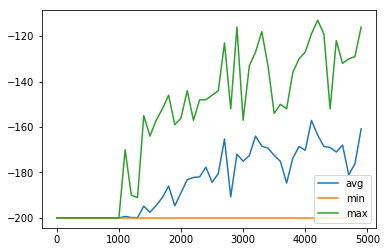

In [3]:
import gym
import numpy as np
import matplotlib.pyplot as plt 
env = gym.make("MountainCar-v0")
env.reset()
discrit_os_size = [20] * len(env.observation_space.high)
discrit_os_win_size = (env.observation_space.high - env.observation_space.low) / discrit_os_size
q_table = np.random.uniform(low=-2,high=0,size=(discrit_os_size + [env.action_space.n]))
ep_rewards = []
aggr_ep_rewards = {"ep":[], "avg":[], "min":[],"max":[]}
DISCOUNT = 0.95
learning_rate = 0.1
episodes = 5000
show_every = 100

epsilon = 0.5
START_EPSILON_DCAYING = 1
END_EPSILON_DECAYING = episodes//2
epsilon_decay_value = epsilon/(END_EPSILON_DECAYING-START_EPSILON_DCAYING)

def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low)/discrit_os_win_size
    return tuple(discrete_state.astype(np.int))
discrete_state = get_discrete_state(env.reset())
q_table[discrete_state]
for episode in range(episodes):
    episode_reward = 0
    if episode%show_every == 0:
        print(episode)
        render = True
    else:
        render = False
        
    discrete_state = get_discrete_state(env.reset())
    done = False
    while not done:
        if np.random.random() > epsilon:
            action = np.argmax(q_table[discrete_state])
        else:
            action = np.random.randint(0,env.action_space.n)
        new_sate,reward,done, _ = env.step(action)
        episode_reward += reward
        new_discrete_state = get_discrete_state(new_sate)
        
        if render:
            env.render()
        if not done:
            max_future_q = np.max(q_table[new_discrete_state])
            current_q =  q_table[discrete_state + (action,)]

            new_q = (1-learning_rate)*current_q + learning_rate*(reward + DISCOUNT*max_future_q)
            q_table[discrete_state + (action,)] = new_q

        elif new_sate[0] >= env.goal_position:
            print(f"we made it episode{episode}")
            q_table[discrete_state + (action,)] = 0
        discrete_state = new_discrete_state
    if END_EPSILON_DECAYING >=episode>=START_EPSILON_DCAYING:
        epsilon -= epsilon_decay_value
    ep_rewards.append(episode_reward)
    
       
    if not episode % show_every:
        np.save(f"{episode}-qtable.npy", q_table)
        average_reward = sum(ep_rewards[-show_every:])/len(ep_rewards[-show_every:])
        aggr_ep_rewards["ep"].append(episode)
        aggr_ep_rewards["avg"].append(average_reward)
        aggr_ep_rewards["min"].append(min(ep_rewards[-show_every:]))
        aggr_ep_rewards["max"].append(max(ep_rewards[-show_every:]))
        print(f"Episode:{episode}, avg:{average_reward}, min:{min(ep_rewards[-show_every:])},max:{max(ep_rewards[-show_every:])}")
        
env.close()
plt.plot(aggr_ep_rewards["ep"],aggr_ep_rewards["avg"],label="avg")
plt.plot(aggr_ep_rewards["ep"],aggr_ep_rewards["min"],label="min")
plt.plot(aggr_ep_rewards["ep"],aggr_ep_rewards["max"],label="max")
plt.legend(loc=4)
plt.show()



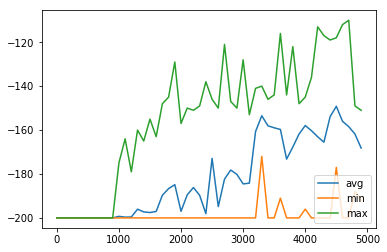

In [2]:
plt.plot(aggr_ep_rewards["ep"],aggr_ep_rewards["avg"],label="avg")
plt.plot(aggr_ep_rewards["ep"],aggr_ep_rewards["min"],label="min")
plt.plot(aggr_ep_rewards["ep"],aggr_ep_rewards["max"],label="max")
plt.legend(loc=4)
plt.show()

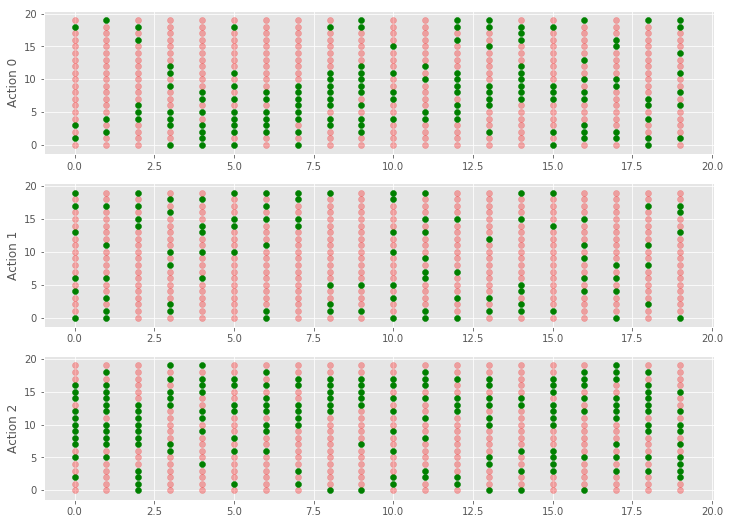

In [41]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

style.use('ggplot')


def get_q_color(value, vals):
    if value == max(vals):
        return "green", 1.0
    else:
        return "red", 0.3


fig = plt.figure(figsize=(12, 9))

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

i = 4800
q_table = np.load(f"q_value/{i}-qtable.npy")


for x, x_vals in enumerate(q_table):
    for y, y_vals in enumerate(x_vals):
        ax1.scatter(x, y, c=get_q_color(y_vals[0], y_vals)[0], marker="o", alpha=get_q_color(y_vals[0], y_vals)[1])
        ax2.scatter(x, y, c=get_q_color(y_vals[1], y_vals)[0], marker="o", alpha=get_q_color(y_vals[1], y_vals)[1])
        ax3.scatter(x, y, c=get_q_color(y_vals[2], y_vals)[0], marker="o", alpha=get_q_color(y_vals[2], y_vals)[1])

        ax1.set_ylabel("Action 0")
        ax2.set_ylabel("Action 1")
        ax3.set_ylabel("Action 2")


plt.show()
